In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Data

In [2]:
data = pd.read_csv('full_catg_data_clustered_ssim_V3.csv')
data = data.replace(np.nan,'None')
# data = data.drop(columns=['cluster'])
data.head(2)

,index,Vulnerability Type(s),Vulnerability Name,Access,Complexity,Authentication,Conf.,Integ.,Avail,Score,Number Of Related Vulnerabilities,Kmeans_clusters,CI SCORE,CI SCORE GLOVE,CI SCORE GLOVE 2
0,1,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,1,0.666677,0.698982,0.620250
1,2,Unknown,Improper Authentication,Remote,Low,Not required,Partial,Partial,Partial,7.5,3011.0,0,0.625171,0.632779,0.567375


In [3]:
data.columns

Index(['index', 'Vulnerability Type(s)', 'Vulnerability Name', 'Access',
       'Complexity', 'Authentication', 'Conf.', 'Integ.', 'Avail', 'Score',
       'Number Of Related Vulnerabilities', 'Kmeans_clusters', 'CI SCORE',
       'CI SCORE GLOVE', 'CI SCORE GLOVE 2'],
      dtype='object')

In [6]:
# import gower

# dist_matrix = gower.gower_matrix(data)

## KPrototype

In [37]:
from kmodes.kprototypes import KPrototypes

categorical_columns = ['Vulnerability Type(s)', 'Vulnerability Name', 
                       'Access', 'Complexity', 'Authentication', 'Conf.', 'Integ.', 'Avail']
numerical_columns = ['Score','Number Of Related Vulnerabilities']

df_array = pd.concat([data[categorical_columns] , data[numerical_columns]] , axis=1).values

n_clusters = 2
kp = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=2)
kp_clusters = kp.fit_predict(df_array, categorical=[0,1,2,3,4,5,6,7])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 650823968299.3531
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1541, ncost: 650823968299.3531
Run: 2, iteration: 2/100, moves: 0, ncost: 650823968299.3531
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 650823968299.3531
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 9251, ncost: 862332141228.5039
Run: 4, iteration: 2/100, moves: 5331, ncost: 666862657924.4928
Run: 4, iteration: 3/100, moves: 1283, ncost: 650823968299.3531
Run: 4, iteration: 4/100, moves: 0, ncost: 650823968299.3531
Init: initializing centroids
Init: initializing

In [40]:
kp.cluster_centroids_

array([['3.380585725368365', '22413.0', 'XSS',
        "Failure to Preserve Web Page Structure ('Cross-site Scripting')",
        'Remote', 'Medium', 'Unknown', 'None', 'Partial', 'None'],
       ['5.028106877358965', '3979.068637372047', 'Unknown',
        'Out-of-bounds Write', 'Remote', 'Low', 'Not required',
        'Partial', 'Partial', 'Partial']], dtype='<U63')

In [42]:
data['Kproto_cluster'] = kp_clusters
data.head(3)

,index,Vulnerability Type(s),Vulnerability Name,Access,Complexity,Authentication,Conf.,Integ.,Avail,Score,Number Of Related Vulnerabilities,Kmeans_clusters,CI SCORE,CI SCORE GLOVE,CI SCORE GLOVE 2,Kproto_cluster
0,1,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,1,0.666677,0.698982,0.620250,0
1,2,Unknown,Improper Authentication,Remote,Low,Not required,Partial,Partial,Partial,7.5,3011.0,0,0.625171,0.632779,0.567375,1
2,3,Unknown,URL Redirection to Untrusted Site ('Open Redir...,Remote,Medium,Not required,Partial,Partial,None,5.8,754.0,0,0.636100,0.627934,0.573071,1


# Plots

In [44]:
np.unique(kp.labels_)

array([0, 1], dtype=uint16)

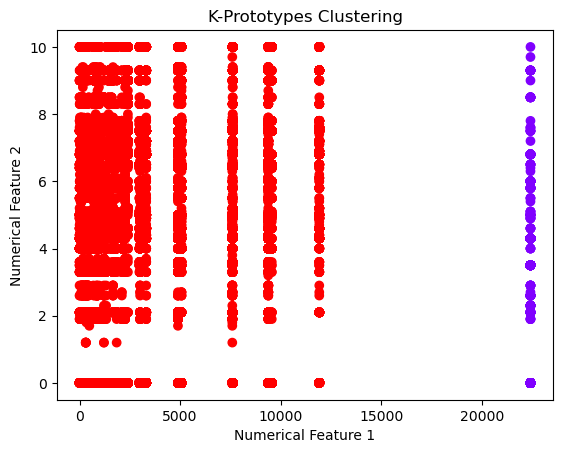

In [51]:
# Scatter plot of clusters
plt.scatter(data[numerical_columns[1]], data[numerical_columns[0]], c=data['Kproto_cluster'], cmap='rainbow')
plt.xlabel('Numerical Feature 1')
plt.ylabel('Numerical Feature 2')
plt.title('K-Prototypes Clustering')
plt.show()

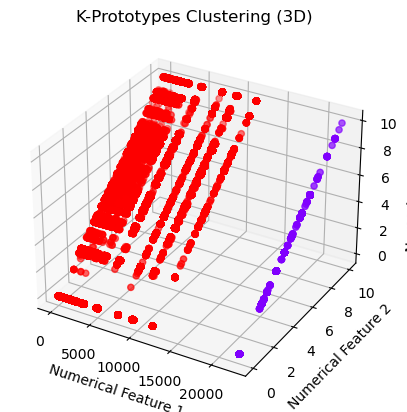

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of clusters in 3D
ax.scatter(data[numerical_columns[1]], data[numerical_columns[0]], data[numerical_columns[0]], c=data['Kproto_cluster'], 
           cmap='rainbow')

ax.set_xlabel('Numerical Feature 1')
ax.set_ylabel('Numerical Feature 2')
ax.set_zlabel('Numerical Feature 3')
ax.set_title('K-Prototypes Clustering (3D)')
plt.show()

# Metrics

In [84]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(ohe , kp_clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.803723781830307


In [85]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(ohe, kp_clusters)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.17192036287384005


In [89]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(ohe, kp_clusters)
print(f'Calinski-Harabasz Index: {ch_score}')


Calinski-Harabasz Index: 276843.5961409916


In [90]:
data.head(3)

,index,Vulnerability Type(s),Vulnerability Name,Access,Complexity,Authentication,Conf.,Integ.,Avail,Score,Number Of Related Vulnerabilities,Kmeans_clusters,CI SCORE,CI SCORE GLOVE,CI SCORE GLOVE 2,Kproto_cluster
0,1,XSS,Failure to Preserve Web Page Structure ('Cross...,Remote,Medium,Not required,None,Partial,None,4.3,22413.0,1,0.666677,0.698982,0.620250,0
1,2,Unknown,Improper Authentication,Remote,Low,Not required,Partial,Partial,Partial,7.5,3011.0,0,0.625171,0.632779,0.567375,1
2,3,Unknown,URL Redirection to Untrusted Site ('Open Redir...,Remote,Medium,Not required,Partial,Partial,None,5.8,754.0,0,0.636100,0.627934,0.573071,1
